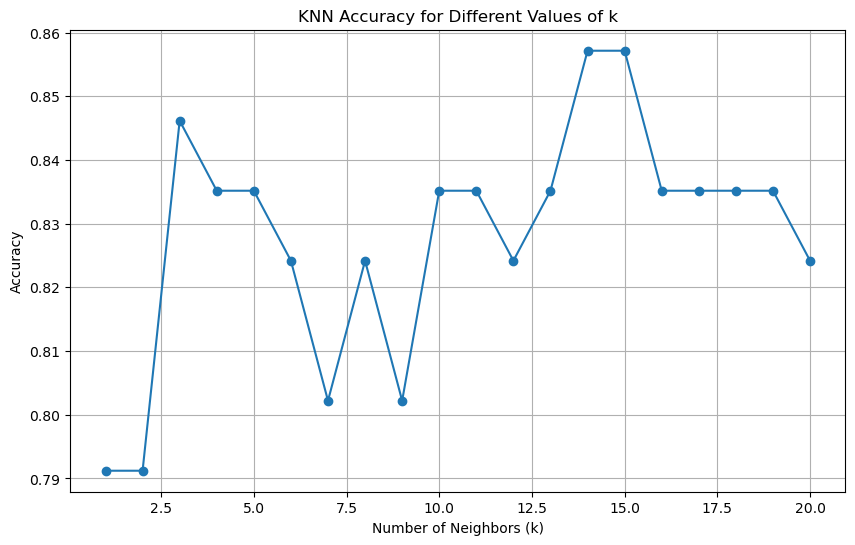


Best k value: 14
Accuracy for best k value (14): 0.8571428571428571

Confusion Matrix for best k value:
[[42  6]
 [ 7 36]]

Classification Report for best k value:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        48
           1       0.86      0.84      0.85        43

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



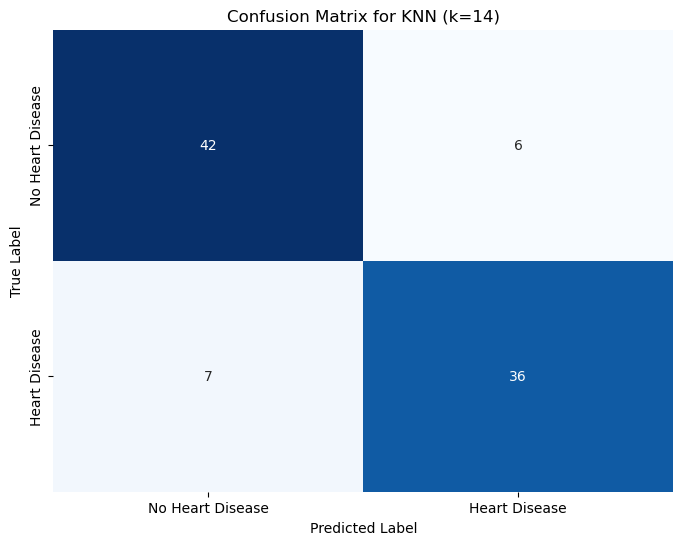

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns  # For plotting the confusion matrix

# Load the Cleveland Heart Disease dataset from UCI repository
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)
df = pd.DataFrame(heart_disease.data.features)
df['num'] = heart_disease.data.targets

# Simplify 'num' to binary classification
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop('num', axis=1, inplace=True)

# Handle missing values (mean imputation)
df.fillna(df.mean(), inplace=True)

# Split data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find the best value of k for KNN
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Get the best k value based on the highest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Train KNN with the best k value
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train_scaled, y_train)
y_best_pred = best_knn_model.predict(X_test_scaled)

# Confusion Matrix and Classification Report for the best k
conf_matrix_best = confusion_matrix(y_test, y_best_pred)
class_report_best = classification_report(y_test, y_best_pred)
best_accuracy_final = accuracy_score(y_test, y_best_pred)

print(f"\nBest k value: {best_k}")
print(f"Accuracy for best k value ({best_k}): {best_accuracy_final}")
print("\nConfusion Matrix for best k value:")
print(conf_matrix_best)
print("\nClassification Report for best k value:")
print(class_report_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title(f"Confusion Matrix for KNN (k={best_k})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()